In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
dir = 'data/external/human_study_v2'
dfs = {}
for file_name in os.listdir(dir):
    user = file_name.split('.')[0]
    dfs[user] = pd.read_csv(os.path.join(dir, file_name))

In [3]:
dfs['user1'] = dfs['user1'].dropna()

In [4]:
docs = dfs['user1']['file_name_unhighlighted'].tolist()

In [5]:
run_times = []
for row_id, doc in enumerate(docs):
    for user, df in dfs.items():
        row = dict(user = user,
                   status = 'Non-highlighted',
                   doc_id = df.iloc[row_id, 0],
                   time = df.iloc[row_id, 1])
        run_times.append(row)
        row = dict(user = user,
                   status = 'Highlighted',
                   doc_id = df.iloc[row_id, 2],
                   time = df.iloc[row_id, 3])
        run_times.append(row)

In [6]:
df = pd.DataFrame(run_times)

In [ ]:
df.dropna(inplace=True)

In [8]:
highlighted, unhighlighted = int(df[df.status=='Highlighted'].mean()), int(df[df.status=='Non-highlighted'].mean())
print(highlighted, unhighlighted)
print('Reduction time spent: ', abs((highlighted-unhighlighted)*100)/unhighlighted, '%')

88 101
Reduction time spent:  12.871287128712872 %


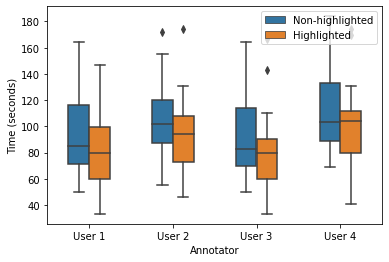

In [10]:
per_user_plot = sns.boxplot(x='user', y='time', hue='status', data=df, 
            width=0.5)
plt.legend(loc='upper right')
per_user_plot.set(xlabel='Annotator', ylabel='Time (seconds)')
per_user_plot.set(xticklabels=['User 1', 'User 2', 'User 3', 'User 4'])
per_user_plot.figure.savefig('reports/human_study/per_user_plot.pdf', format='pdf')

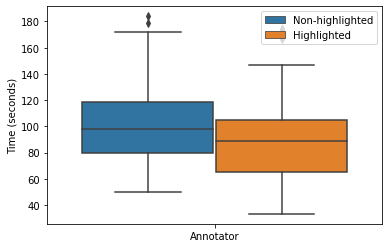

In [30]:
df['user'] = ''
sum_plot = sns.boxplot(data=df, x='user', y='time', hue='status')
plt.legend(loc='upper right')
sum_plot.set(xlabel='', ylabel='Time (seconds)')
sum_plot.set(xticklabels=['Annotator'])
sum_plot.figure.savefig('reports/human_study/sum_user_plot.pdf', format='pdf')